# Chapter4 : Fundamentals of machine learning

## 4.3 Data preprocessing, feature engineering, and feature learning

### 4.3.1 Data preprocessing for neural networks

Data preprocessing aims at making the raw data at hand more amenable to neural networks. This includes the following:
  + vectorization
  + normalization
  + handling missing values
  + feature extraction

#### VECTORIZATION

All inputs and targets in a neural network must be tensors of floating-point data. Whatever data you need to process--sound, images, text--you must first turn into tensors, a step called ***data vectorization***.

#### VALUE NORMALIZATION

In general, it isn't safe to feed into a neural network data that takes relatively large values or data that is heterogeneous. Doing so can trigger large gradient updates that will prevent the network from converging. To make learning easier for your network, your data should have the following characteristics:
  + Take small values--Typically, most values should be in the 0-1 range.
  + Be homogenous--All features should take values in roughly the same range.

In [ ]:
x -= x.mean(axis = 0)
x /= x.std(axis = 0)

#### HANDLING MISSING VALUES

You may sometimes have missing values in your data. Hence, in general, with neural networks, it's safe to input missing values as 0, with the condition that 0 isn't already a meaningful value.

Note that if you're expecting missing values in the test data, but the network was trained on data without any missing values, the network won't have learned to ignore missing values!
  + In this situation, you should aritifically generate training samples with missing entries

### 4.3.2 Feature engineering

***Feature engineering*** is the process of using your own knowledge about the data and about the machine-learning algorithm at hand to make the algorithm work better by applying hardcoded transformations to the data before it goes into the model.

Fortunately, modern deep learning removes the need for most feature engineering, because neural networks are capable of automatically extracting useful features from raw data. However, this doesn't mean you don't have to worry about feature engineering, for two reasons:
  + Good features still allow you to solve problems more elegantly while using fewer resources.
  + Good features let you solve a problem with far less data.

## 4.4 Overfitting and underfitting

Overfitting happens in every machine-learning problem. Learning how to deal with overfitting is essential to mastering machine learning.

The fundanmental issue in machine learning is the tension between optimization and generalization. ***Optimimzation*** refers to the process of adjusting a model to get the best performance possible on the training data, whereas ***generalization*** refers to how well the trained model performs on data it has never seen before.

At the beginning of training, the lower the loss on training data, the lower the loss on test data. This is said to be ***underfit***; the network hasn't yet modeled all relavant patterns in the training data.
But after a certain number of iterations on the training data, the model starts to ***overfit***.

The processing of fighting overfitting is called ***regularization***.

### 4.4.1 Reducing the network's size

The simplest way to prevent overfitting is to reduce the size of the model. In deep learning, the number of learnable parameters in a model is often referred to as the model's ***capacity***.

Intuitively, a model with more parameters has more ***memorization capacity*** and therefore can easily learn a perfect dictionary-like mapping between training samples and their targets. On the other hand, if the network has limited memorization resources, it won't be able to learn this mapping as easily; **thus in order to minimize its loss, it will have to resort to learning compressed representation that have predictive power regarding the targets**--precisely the type of representation we're interested in.

Unfortunately, there is no magical formula to determine the right number of layers or the right size for each layer.

The general workflow to find an appropriate model size is to **start with relatively few layers and parameters**, and **increase the size of the layers or add new layers until you see diminishing returns** with regard to validation loss.

#### Example using movie-review dataset

In [1]:
# load movie-review classification network
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [2]:
train_data.shape

(25000,)

In [3]:
train_labels[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [4]:
len(train_labels)

25000

##### One-hot encoding 직접 함수 만들기

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000) :
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences) :
        results[i, sequence] = 1.
    return results

In [6]:
train_data = vectorize_sequences(train_data)

In [7]:
train_data[:3]

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [8]:
vectorize_sequences(train_labels, 2)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

##### One-hot encoding 'keras.utils.np_utils'의 'to_categorical' 함수 쓰기

In [9]:
from  keras.utils.np_utils import to_categorical

In [10]:
y_train = to_categorical(train_labels)

In [11]:
y_train

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

#### Original model

In [12]:
from keras import models
from keras import layers

In [13]:
model = models.Sequential()

model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(2, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
# train data / validation data
val_x = train_data[:1000]
val_y = y_train[:1000]

train_x = train_data[1000:]
train_y = y_train[1000:]

In [15]:
history = model.fit(train_x, train_y,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (val_x, val_y),
                    verbose = 0)

Instructions for updating:
Use tf.cast instead.


In [16]:
val_loss = history.history['val_loss']
train_loss = history.history['loss']

In [17]:
original = int(str([i for i, j in enumerate(val_loss) if j == min(val_loss)]).strip('[]'))
original

1

In [18]:
import matplotlib.pyplot as plt

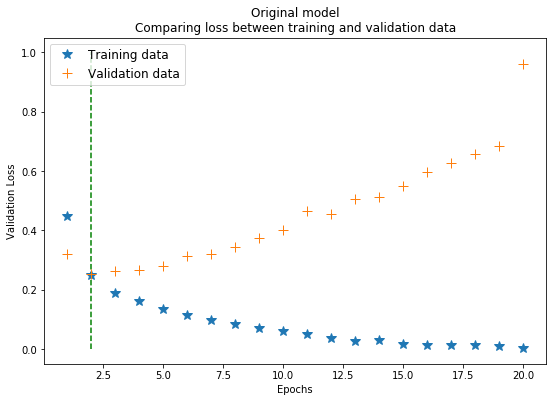

In [19]:
plt.figure(figsize = (9,6))
plt.plot(range(1, len(val_loss)+1), train_loss, '*', markersize = 10, label = 'Training data')
plt.plot(range(1, len(val_loss)+1), val_loss, '+', markersize = 10, label = 'Validation data')
plt.vlines(x = original+1, ymin = 0, ymax = 1, linestyles = 'dashed', colors = 'g')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Original model\nComparing loss between training and validation data')
plt.legend(fontsize = 12)
plt.show()

#### Version of the model with lower capacity

In [20]:
model = models.Sequential()

model.add(layers.Dense(4, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(4, activation = 'relu'))
model.add(layers.Dense(2, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [21]:
history = model.fit(train_x, train_y,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (val_x, val_y),
                    verbose = 0)

In [22]:
less_val_loss = history.history['val_loss']
less_train_loss = history.history['loss']

In [23]:
smaller = int(str([i for i, j in enumerate(less_val_loss) if j == min(less_val_loss)]).strip('[]'))
smaller

5

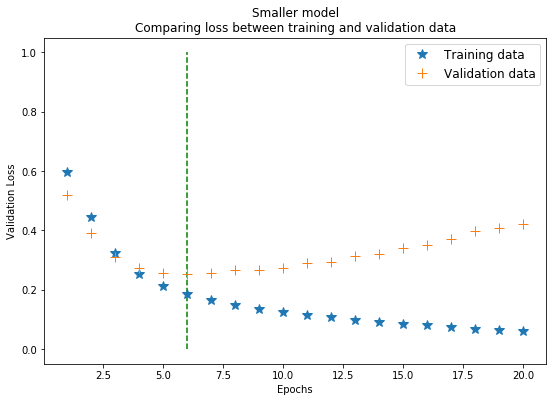

In [24]:
plt.figure(figsize = (9,6))
plt.plot(range(1, len(less_val_loss)+1), less_train_loss, '*', markersize = 10, label = 'Training data')
plt.plot(range(1, len(less_val_loss)+1), less_val_loss, '+', markersize = 10, label = 'Validation data')
plt.vlines(x = smaller+1, ymin = 0, ymax = 1, linestyles = 'dashed', colors = 'g')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Smaller model\nComparing loss between training and validation data')
plt.legend(fontsize = 12)
plt.show()

#### Comparison of the validation losses of the original network and the smaller network

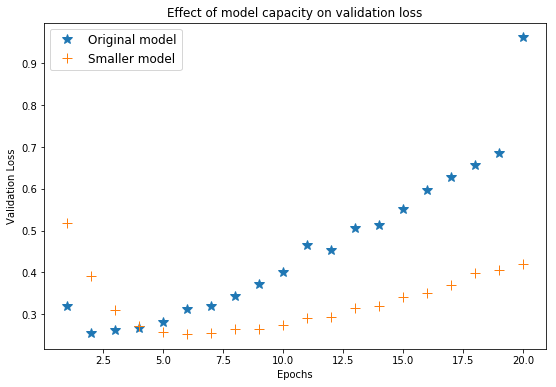

In [25]:
plt.figure(figsize = (9,6))
plt.plot(range(1, len(val_loss)+1), val_loss, '*', markersize = 10, label = 'Original model')
plt.plot(range(1, len(val_loss)+1), less_val_loss, '+', markersize = 10, label = 'Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Effect of model capacity on validation loss')
plt.legend(fontsize = 12)
plt.show()

> The smaller network starts overfitting later than the reference network, and its performane degrades more slowly once it starts overfitting.

#### Version of the model with higher capacity

In [26]:
model = models.Sequential()

model.add(layers.Dense(256, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(2, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(train_x, train_y,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (val_x, val_y),
                    verbose = 0)

In [27]:
big_val_loss = history.history['val_loss']
big_train_loss = history.history['loss']

In [28]:
bigger = int(str([i for i, j in enumerate(big_val_loss) if j == min(big_val_loss)]).strip('[]'))
bigger

2

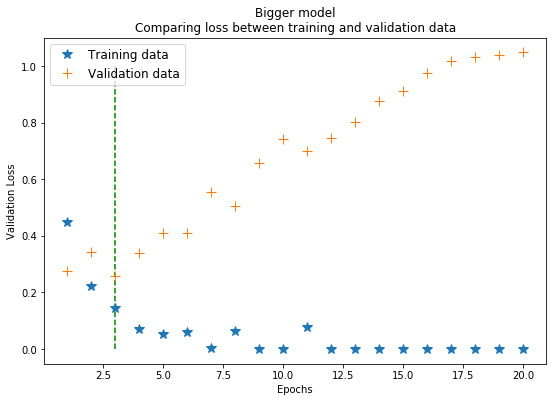

In [29]:
plt.figure(figsize = (9,6))
plt.plot(range(1, len(big_val_loss)+1), big_train_loss, '*', markersize = 10, label = 'Training data')
plt.plot(range(1, len(big_val_loss)+1), big_val_loss, '+', markersize = 10, label = 'Validation data')
plt.vlines(x = bigger+1, ymin = 0, ymax = 1, linestyles = 'dashed', colors = 'g')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Bigger model\nComparing loss between training and validation data')
plt.legend(fontsize = 12)
plt.show()

#### Comparison of the validation losses of the original network and the bigger network

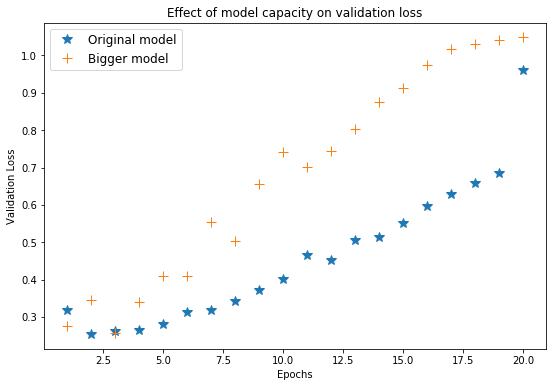

In [30]:
plt.figure(figsize = (9,6))
plt.plot(range(1, len(val_loss)+1), val_loss, '*', markersize = 10, label = 'Original model')
plt.plot(range(1, len(val_loss)+1), big_val_loss, '+', markersize = 10, label = 'Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Effect of model capacity on validation loss')
plt.legend(fontsize = 12)
plt.show()

> The bigger model starts overfitting almost immediately, after just one epoch, and it overfits much more severly. Its validation loss is also noiser.

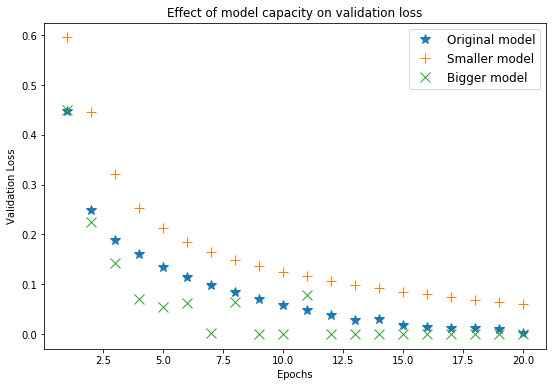

In [31]:
plt.figure(figsize = (9,6))
plt.plot(range(1, len(val_loss)+1), train_loss, '*', markersize = 10, label = 'Original model')
plt.plot(range(1, len(val_loss)+1), less_train_loss, '+', markersize = 10, label = 'Smaller model')
plt.plot(range(1, len(val_loss)+1), big_train_loss, 'x', markersize = 10, label = 'Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Effect of model capacity on validation loss')
plt.legend(fontsize = 12)
plt.show()

> The bigger network gets its training loss near zero very quickly.

>The more capacity the network has, the more quickly it can model the training data, but the more susceptible it is to overfitting.

### 4.4.2 Adding weight regularization

A common way to mitigate overfitting is to put constraints on the complexity of a network by forcing its weights to take only small values, which makes the distribution of weight values more ***regular***. This is called ***weight regulation***.

***Weight regularization*** is done by adding to the loss functions of the network a *cost* associated with having large weights.
  + ***L1 regularization***--The cost added is proportional to the **absolute value of the weight coefficients**.
  + ***L2 regularization***--The cost added is proportional to the **square of the value of the weight coefficients**. This is also called *weight decay*.

#### Adding L2 weight regularization to the model

In [32]:
from keras import regularizers

In [33]:
model = models.Sequential()

model.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001),
                       activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001),
                       activation = 'relu'))
model.add(layers.Dense(2, activation = 'softmax'))

* '*l2(0.001)*' means every efficient in the weight matrix of the layer will add '0.001*weight_coefficient_value' to the total loss of the network.

* Note that because this **penalty** is *only added at training time*, **the loss for this network will be much higher at training than at test time**.

In [34]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(train_x, train_y,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (val_x, val_y),
                    verbose = 0)

In [35]:
l2_val_loss = history.history['val_loss']
l2_loss = history.history['loss']

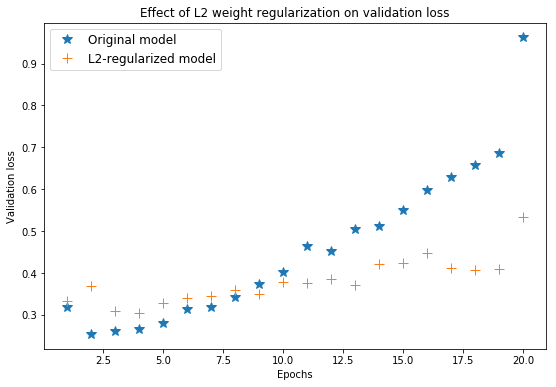

In [36]:
plt.figure(figsize = (9,6))
plt.plot(range(1, len(val_loss)+1), val_loss, '*', markersize = 10, label = 'Original model')
plt.plot(range(1, len(val_loss)+1), l2_val_loss, '+', markersize = 10, label = 'L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.title('Effect of L2 weight regularization on validation loss')
plt.legend(fontsize = 12)
plt.show()

> The model with L2 regularization has become **much more resistant to overfitting** than the reference model, even though both models have the same number of parameters.

#### Different weigth regularizers available in Keras

In [37]:
from keras import regularizers
# L1 regularization
regularizers.l1(0.001)
# L1 and L2 regularization
regularizers.l1_l2(l1 = 0.001, l2 = 0.001)

### 4.4.3 Adding dropout

*Dropout* is one of the most effective and most commonly used regularization techniques for neural networks. ***Dropout***, applied to a layer, consists of randomly *dropping out* a number of output features of the layer during training.

The ***dropout rate*** is the fraction of the features that are zeroed out; it's usually set between 0.2 and 0.5.

At test time, no units are dropped out; instead, the layer's output values are scaled down by a factor equal to the dropout rate, to balance for the fact that more units are active than at training time.

Why would this help reduce overfitting?
  + Randomly removing a different subset of neurons on each example would prevent conspiracies and thus reduce overfitting.
  + Introducing noise in the output values of a layer can break up happenstance patterns that aren't significant, which the network will start memorizing if no noise is present.

#### Adding dropout to the IMDB network

In [38]:
model = models.Sequential()

model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(train_x, train_y,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (val_x, val_y),
                    verbose = 0)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [39]:
dropout_val_loss = history.history['val_loss']
dropout_loss = history.history['loss']

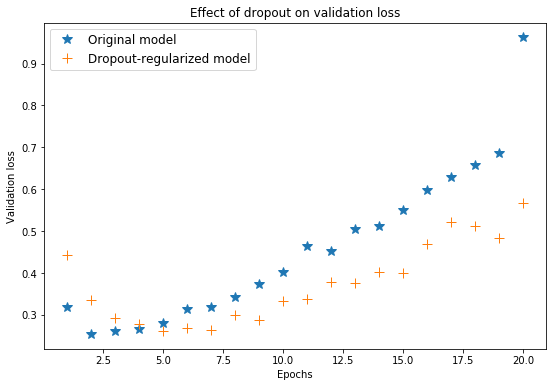

In [40]:
plt.figure(figsize = (9,6))
plt.plot(range(1, len(val_loss)+1), val_loss, '*', markersize = 10, label = 'Original model')
plt.plot(range(1, len(val_loss)+1), dropout_val_loss, '+', markersize = 10, label = 'Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.title('Effect of dropout on validation loss')
plt.legend(fontsize = 12)
plt.show()

> This is a clear improvement over the reference network.

### Recap!!

The most common ways to prevent overfitting in neural networks:
  + Get more training data
  + Reduce the capacity of the network
  + Add weight regularization
  + Add dropout